# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Jonathan Afriliansyah]
- **Email:** [jonafriansyah3@gmail.com]
- **ID Dicoding:** [williamyuei]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana performa penjualan dan revenue perusahaan perbulannya?
- Pertanyaan 2 Produk apa yang paling banyak dan paling sedikit terjual?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_customers_dataset.csv")
customers_df.head()

orders_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_orders_dataset.csv")
orders_df.head()

order_items_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_order_items_dataset.csv")
order_items_df.head()

order_payments_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_order_payments_dataset.csv")
order_payments_df.head()

order_reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_order_reviews_dataset.csv")
order_reviews_df.head()

products_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_products_dataset.csv")
products_df.head()

sellers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_sellers_dataset.csv")
sellers_df.head()

product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/product_category_name_translation.csv")
product_category_name_translation_df.head()

geolocation_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Seluruh data yang terkumpul bekerja dengan baik
- Berdasarkan 2 pertanyaan bisnis di awal, kita tidak memerlukan data lokasi, seller.

### Assessing Data

In [ ]:
customers_df.info()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum(),"\n")
customers_df.describe()

orders_df.info()
orders_df.isna().sum()
print("Jumlah duplikasi: ", orders_df.duplicated().sum(),"\n")
orders_df.describe()

order_items_df.info()
order_items_df.isna().sum()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum(),"\n")
order_items_df.describe()

order_payments_df.info()
order_payments_df.isna().sum()
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum(),"\n")
order_payments_df.describe()

order_reviews_df.info()
order_reviews_df.isna().sum()
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum(),"\n")
order_reviews_df.describe()

products_df.info()
products_df.isna().sum()
print("Jumlah duplikasi: ", products_df.duplicated().sum(),"\n")
products_df.describe()

product_category_name_translation_df.info()
product_category_name_translation_df.isna().sum()
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum(),"\n")
product_category_name_translation_df.describe()

sellers_df.info()
sellers_df.isna().sum()
print("Jumlah duplikasi: ", sellers_df.duplicated().sum(),"\n")
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Data Customer tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Orders pada field timestamp, date, dan approved at menggunakan tipe data yang salah, memiliki beberapa nilai kosong, pada field order_approved_at terdapat 160 nilai kosong yang berarti order dibatalkan atau untuk kasus langkan order sudah dikirimkan, sementara pada field order_delivered_carrier_date terdapat 1783 data kosong yang berarti order dibatalkan, sedang diproses, atau unavailable, lalu pada field order_delivered_customer_date terdapat 2965 data kosong yang berarti order dibatalkan, sedang diproses, atau unavailable. Apabila pada suatu record hanya field order_delivered_customer_date yang kosong, maka order tersebut sedang dikirimkan oleh kurir. Tidak terdapat duplikat maupun inacurrate value.
- Data Order Item tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Order Payments tidak memiliki nilai kosong, duplikat, maupun inacurrate value.
- Data Order review  pada field timestamp dan date menggunakan tipe data yang salah memiliki nilai kosong, tidak ada data duplikat maupun inacurrate value, namun berdasarkan pertanyaan analisis value, kita tidak akan menggunakan data reviews sebagai pertimbangan.
- Data Product Order memiliki 640 nilai kosong di field category_name, name_length, description_length, dan photos, serta 2 nilai kosong di field weight, length, height, dan width. Tidak ada duplikat maupun inacurrate value
- Data Product Category Name Translation tidak memiliki nilai kosong, duplikat, maupun inacurrate value
- Data Seller tidak memiliki nilai kosong, duplikat, maupun inacurrate value

### Cleaning Data

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.dropna(axis=0, subset=['order_approved_at','order_delivered_carrier_date'], inplace=True, how='all')
orders_df.dropna(axis=0, subset=['order_delivered_carrier_date'], inplace=True)
orders_df.interpolate(method='linear', limit_direction='forward', inplace=True)
orders_df.info()

datetime1_columns = ["shipping_limit_date"]
for column in datetime1_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

products_df.dropna(axis=0, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97658 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97658 non-null  object        
 1   customer_id                    97658 non-null  object        
 2   order_status                   97658 non-null  object        
 3   order_purchase_timestamp       97658 non-null  datetime64[ns]
 4   order_approved_at              97658 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  97658 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97658 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         


<ipython-input-11-8a4426b77efa>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  orders_df.interpolate(method='linear', limit_direction='forward', inplace=True)


**Insight:**
- Data Orders perlu dibersihkan. Mengubah tipe data field-field yang sesuai dari object ke datetime. Missing value pada field order_approved_at terdapat beberapa data dengan status delivered, untuk missing value pada field order_approved_at dan order_delivered_carrier_date maka dapat dipastikan order tersebut tidak sampai kepada pembeli, maka data tersebut akan didrop, sementara untuk missing value pada order_delivered_customer_date saja menunjukkan bahwa orderan tersebut sedang diantar, maka kita akan mengisi missing value di data tersebut menggunakan teknik interpolasi.
- Data Orders Item perlu dibersihkan. Mengubah tipe data shipping_limit_date ke datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
customers_df.describe(include="all")
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.describe(include="all")

profit = order_items_df["price"] - order_items_df["freight_value"]
orders_df["profit"] = profit
order_items_df.describe(include="all")

customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.groupby(by="status").customer_id.count()

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

order_items_df.describe(include="all")
order_items_df.sort_values(by="price", ascending=False)
order_items_df = order_items_df.drop(columns=["shipping_limit_date"])

products_df = products_df.drop(columns=["product_name_lenght", "product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"], axis=1)
products_translation_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_translation_df.describe(include="all")
products_translation_df.dropna(axis=0, inplace=True)
products_translation_df.info()

orders_customers_df = orders_customers_df.drop(columns=[ "order_purchase_timestamp","order_estimated_delivery_date","customer_zip_code_prefix","customer_city","customer_state"])

order_products_translation_df = pd.merge(
    left=products_translation_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

all_df = pd.merge(
    left=order_products_translation_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.describe(include="all")
all_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32339
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32327 non-null  object
 1   product_category_name          32327 non-null  object
 2   product_category_name_english  32327 non-null  object
dtypes: object(3)
memory usage: 1010.2+ KB


,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,profit,customer_unique_id,status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,3.0,314.11,b1a1199364a4a7fe27c4486ab63f550d,Active
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,16.0,191.11,4b86049cb99e4aa774031daa9cd18f18,Active
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2.0,23.24,f63805d9c7edb84d92413af34b86a39c,Active
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,3.0,88.66,619e926d09b26efbd5180368b1ddc874,Active
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,3.0,11.93,ad353b4fb0e294adc4eda48af73e68a6,Active


**Insight:**
- Dari Data Customer dapat ditarik kesimpulan bahwa pelanggan terbanyak berasal dari State SP yaitu sebanyak 41746, lalu sebanyak 15540 pelanggan berasal dari kota Sao Paolo
- Dari Data Order, dapat ditarik kesimpulan bahwa rata-rata delivery time adalah 12 hari dengan perhitungan order_delivered_customer_date - order_approved_at.
- Dari Data Customer dan Order Jumlah pelanggan aktif 97658, sedangkan pelanggan tidak aktif 1783. Adapun kota dengan jumlah order terbanyak adalah 15199 order dari kota Sao Paolo, dan 6781 order dari kota Rio de Janairo. Adapun state dengan jumlah order terbanyak ada 40858 dari SP dan 12658 dari RJ
- Dari Data Order dapat ditarik kesimpulan bahwa barang termahal yang dijual memiliki harga 6735 dan harga termurah 0,85, lalu kita drop semua product yang meiliki missing value (product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm). Kemudian gabungkan DF product dengan translasinya. Lalu gabungkan product_translasi_df dengan order_item
- Karena kita tidak perlu memetakan daerah penjualan, maka kita dapat menghilangkan kolom-kolom yang tidak perlu.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-25-5288eebf96cc>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


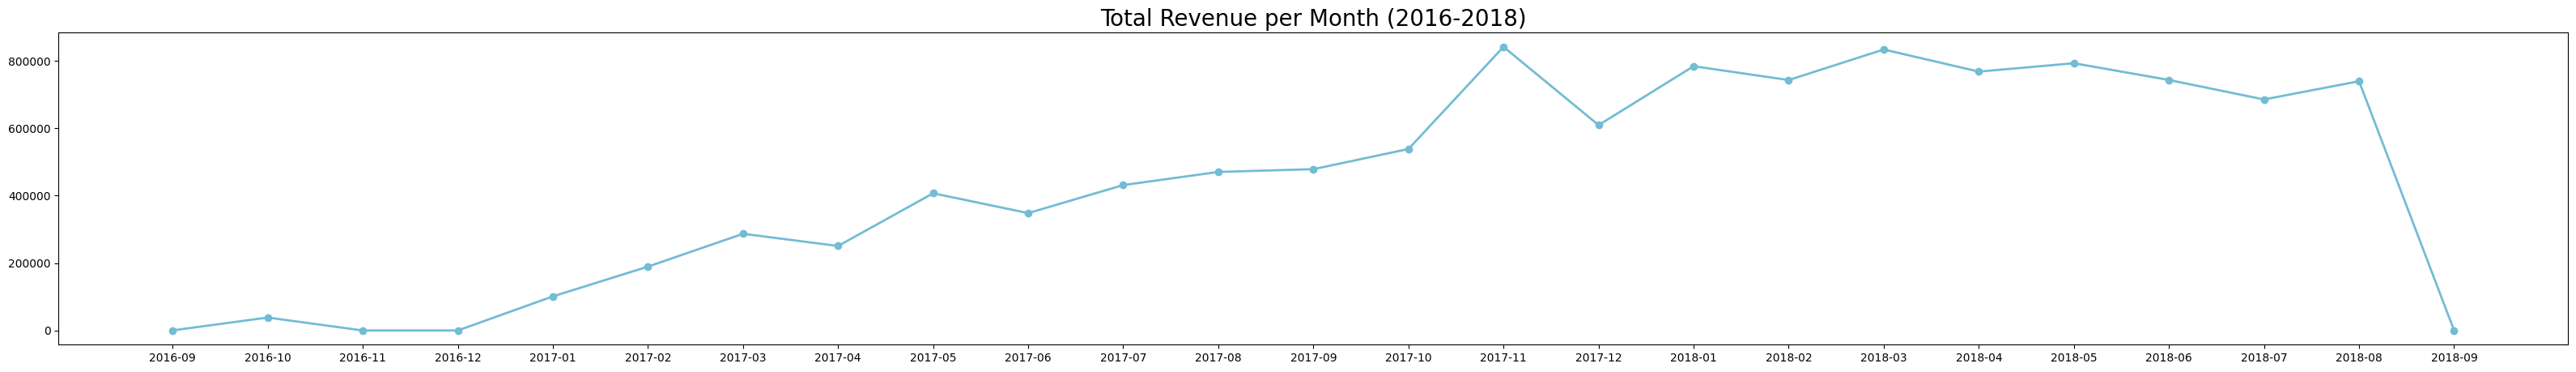

In [25]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "profit": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

plt.figure(figsize=(40, 5))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["profit"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Profit perusahaan memiliki tren naik dengan profit tertinggi perusahaan terjadi di tahun 2017 bulan November sekitar lebih dari 800000
- Profit perusahaan dari bulan September hingga Desember tahun 2016 kurang dari 15000

### Pertanyaan 2:

<ipython-input-10-87c362b2df62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-10-87c362b2df62>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


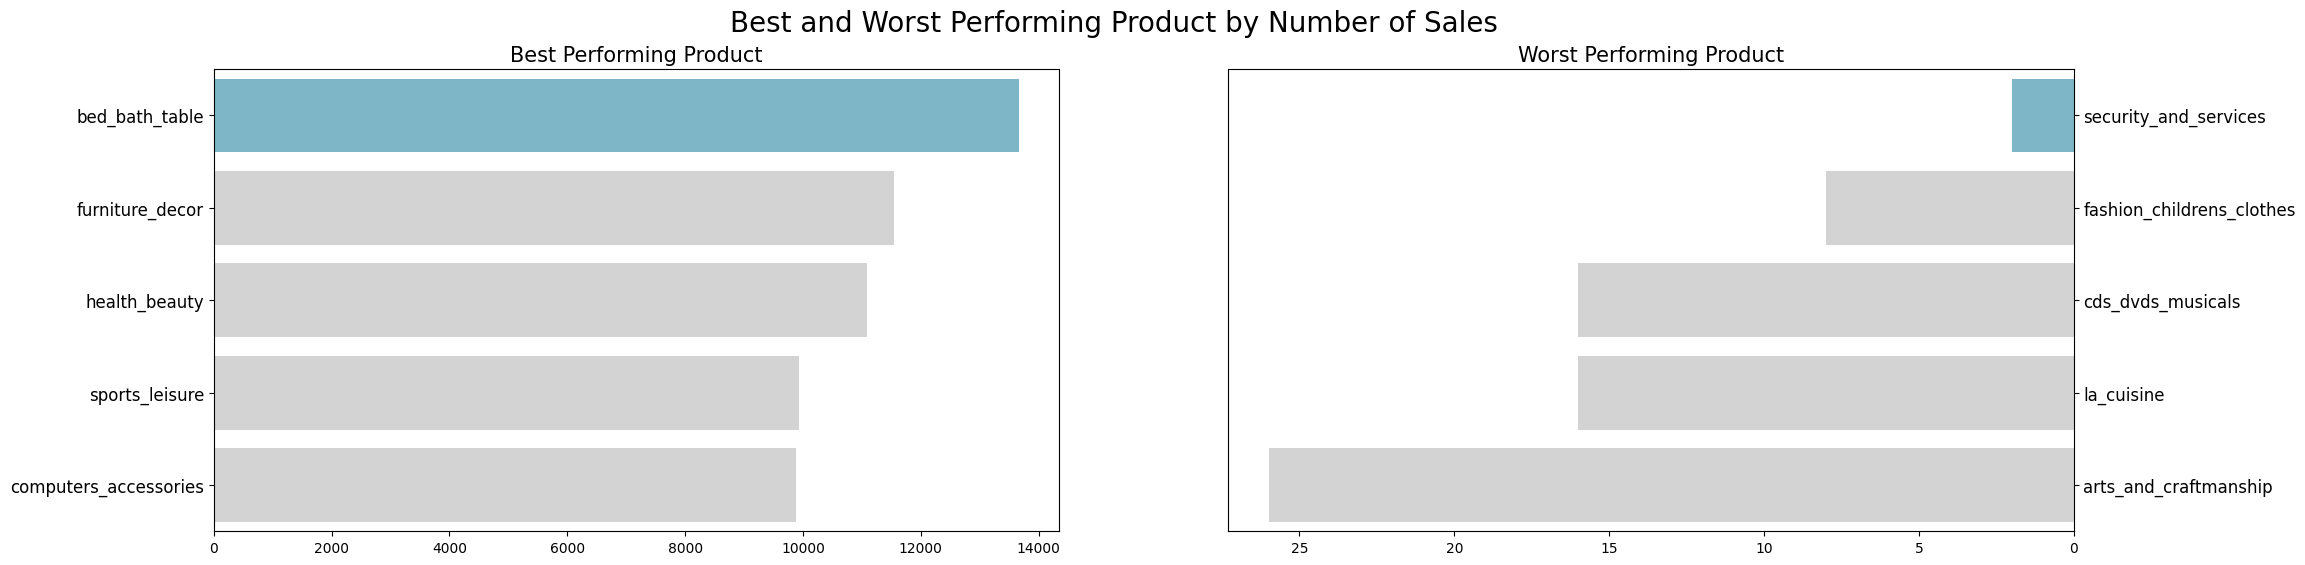

In [ ]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- bed_bath_table merupakan produk terlaris perusahaan dengan penjualan mendekati 14000 unit
- security_and_services merupakan produk yang jarang dibeli dengan penjualan hanya sebanyak 1 unit

## Analisis Lanjutan (Opsional)

<ipython-input-24-4aea89854795>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-24-4aea89854795>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-24-4aea89854795>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by=

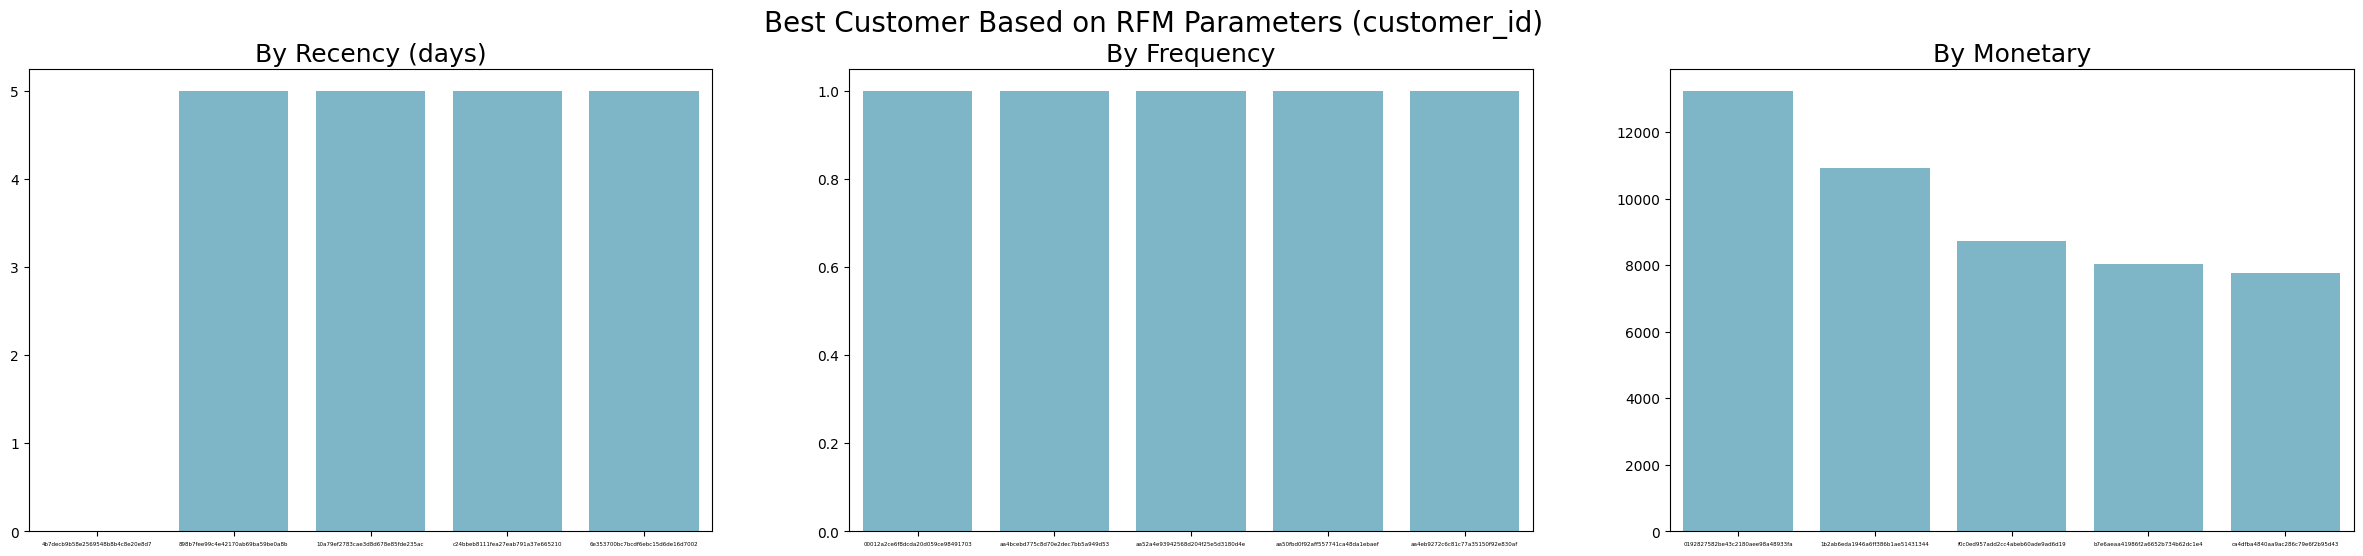

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111022 entries, 0 to 111021
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     111022 non-null  object        
 1   product_category_name          111022 non-null  object        
 2   product_category_name_english  111022 non-null  object        
 3   order_id                       111022 non-null  object        
 4   order_item_id                  111022 non-null  int64         
 5   seller_id                      111022 non-null  object        
 6   price                          111022 non-null  float64       
 7   freight_value                  111022 non-null  float64       
 8   customer_id                    109867 non-null  object        
 9   order_status                   109867 non-null  object        
 10  order_approved_at              109867 non-null  datetime64[ns]
 11  

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "profit": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=4)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=4)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=4)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

all_df.to_csv("all_data.csv", index=False)

all_df.info()

## Conclusion

- Profit perusahaan memiliki tren naik dengan profit tertinggi perusahaan terjadi di tahun 2017 bulan November sekitar lebih dari 800000, Profit perusahaan dari bulan September hingga Desember tahun 2016 kurang dari 15000. 4 bulan pertama merupakan masa-masa sulit bagi perusahaan, namun tren profit yang naik menunjukkan performa perusahaan meningkat
- bed_bath_table merupakan produk terlaris perusahaan dengan penjualan mendekati 14000 unit, security_and_services merupakan produk yang jarang dibeli dengan penjualan hanya sebanyak 1 unit. bed_bath_table merupakan produk terlaris hal ini menunjukkan bahwa pelanggan cenderung untuk membeli furnitur rumah.